# Assignment simple linear regression

* We will predict employee salaries from different employee characteristics (or features). We are going to use a simple supervised learning technique: linear regression.
* We want to build a simple model to determine how well Years Worked predicts an employee’s salary.

Import the data salary.csv to a Jupyter Notebook. A description of the variables is given in Salary Metadata. You will need the packages matplotlib, pandas and statsmodels.

In [116]:
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import seaborn as sns
sns.set()
raw_data = pd.read_csv('salary.csv')

### prepairing raw data
* finding missing values
* filling missing values

In [117]:
raw_data.isnull().sum()

salary         1
exprior        0
yearsworked    0
yearsrank      0
market         0
degree         0
otherqual      0
position       0
male           0
Field          0
yearsabs       0
dtype: int64

there is only one missing values in the column salary

filling missing values

In [118]:
# raw_data.salary.fillna(raw_data.salary.mean(), inplace=True)
raw_data.dropna(inplace=True)

### 1. Split your data into a training and test set. Leave the test set for now. Examine the training data for missing and extreme values. Create histograms to show the distribution of the variables and a scatterplot showing the relationship between Years Worked and Salary. Are the data appropriate for linear regression? Is there anything that needs to be transformed or edited first?

* splitting data
* examining the training data


In [119]:

train_data, test_data = train_test_split(raw_data, test_size=0.2, random_state=24)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 297 to 419
Data columns (total 11 columns):
salary         410 non-null float64
exprior        410 non-null int64
yearsworked    410 non-null int64
yearsrank      410 non-null int64
market         410 non-null float64
degree         410 non-null int64
otherqual      410 non-null int64
position       410 non-null int64
male           410 non-null int64
Field          410 non-null int64
yearsabs       410 non-null int64
dtypes: float64(2), int64(9)
memory usage: 38.4 KB


### visualizing
* Histograms
* scatterplot

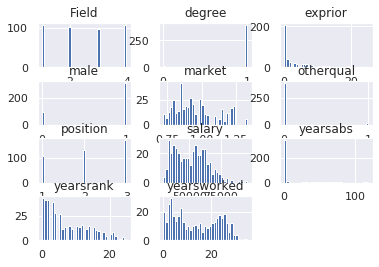

In [120]:
train_data.hist(bins=35)
plt.show()

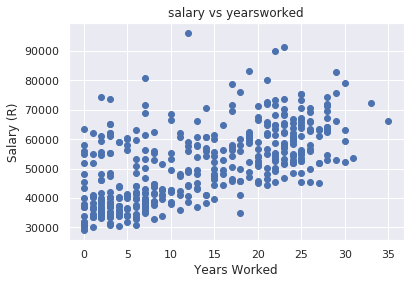

In [121]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
plt.title('salary vs yearsworked')
plt.xlabel('Years Worked')
plt.ylabel('Salary (R)')
plt.show()

### 2.Using the statsmodels package and the training data, run a simple linear regression for Salary with one predictor variable: Years Worked.

In [96]:
y_train = train_data['salary']
x_train = train_data['yearsworked']
x = sm.add_constant(x_train)
model = sm.OLS(y_train,x).fit()
# Displaying the model summary
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.384
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     254.0
Date:                Wed, 05 Feb 2020   Prob (F-statistic):           8.33e-45
Time:                        14:33:37   Log-Likelihood:                -4360.2
No. Observations:                 410   AIC:                             8724.
Df Residuals:                     408   BIC:                             8733.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.992e+04    862.510     46.278      0.000    3.82e+04    4.16e+04
yearsworked   855.6879     53.689     15.938      0.000     750.146     961.230
==============================================================================
Omnibus:                       68.272   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.131
Skew:                           1.060   Prob(JB):                     4.03e-23
Kurtosis:                       4.244   Cond. No.                         27.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Does the model significantly predict the dependent variable? Report the amount of variance explained (R^2) and significance value (p) to support your answer.

In [93]:
# checking if my model predicts correct values
print('salary for a person with zero years worked',model.predict([1,0]))
# constant and x_value
print(model.params)

salary for a person with zero years worked [39915.34218168]
const          39915.342182
yearsworked      855.687939
dtype: float64


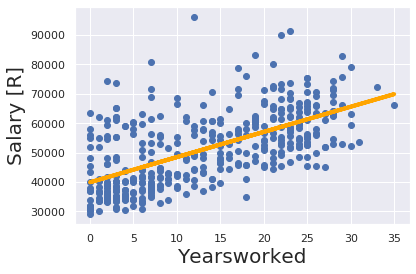

In [74]:
plt.scatter(x='yearsworked', y='salary', data=train_data)
yhat = 855.6879*x_train + 39920
fig = plt.plot(x_train, yhat, lw=4, c='orange', label='regression line')
plt.xlabel('Yearsworked', fontsize =20)
plt.ylabel('Salary [R]', fontsize =20)
plt.show()

What percentage of the variance in employees’ salaries is accounted for by the number of years they have worked?

### 3.What does the unstandardized coefficient (B or ‘coef’ in statsmodels) tell you about the relationship between Years Worked and Salary?

salary = 855.6879*x_train + 39920

The unstandardized coefficient of model tells me that a person with zero years worked earns a salary of R39920

### 4.What do the 95% confidence intervals [0.025, 0.975] mean?

it means the model is 95% confident that the mean of salaries is between R38200 and	R41600

### 5.Calculate the expected salary for someone with 12 years’ work experience.

In [33]:
print('12years work experience salary',model.predict([1,12]))

12years work experience salary [50183.59745059]


### 6.Calculate the expected salary for someone with 80 years’ work experience. Are there any problems with this prediction? If so, what are they?

In [34]:
print('model prediction =',model.predict([1,80]))
print('regression formula prediction =', 840.1199*80 + 39790)
print('no problems')

model prediction = [108370.37730779]
regression formula prediction = 106999.592
no problems


### 7.We have only looked at the number of years an employee has worked. What other employee characteristics might influence their salary?

In [35]:
raw_data.corr()['salary']

salary         1.000000
exprior        0.119989
yearsworked    0.623589
yearsrank      0.610706
market         0.407214
degree         0.044554
otherqual      0.167137
position       0.702122
male           0.361564
Field         -0.499316
yearsabs      -0.069630
Name: salary, dtype: float64

#### employee characteristics that might influence their salary
* position
* years rank
* market

### 8.How does your model compare when running it on the test set - what is the difference in the Root Mean Square Error (RMSE) between the training and test sets? Is there any evidence of overfitting?

In [109]:
model.predict(test_data[['salary','yearsworked']])

502    1.946481e+09
286    2.252563e+09
31     1.375805e+09
334    2.682295e+09
425    2.394921e+09
           ...     
423    1.460226e+09
371    3.595673e+09
448    1.826652e+09
82     1.638008e+09
358    2.228334e+09
Length: 103, dtype: float64